# 02-Fashion

![](https://images.unsplash.com/photo-1512436991641-6745cdb1723f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Lauren Fleischmann](https://unsplash.com/photos/R2aodqJn3b8)

In this exercise, we will try to use a neural network on a simple classification task: classifying images on clothes into 10 classes.

We will first download the data:

In [1]:
from keras.models import Sequential
from keras.layers import Dense

/home/wafa/bin/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

/home/wafa/bin/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

Now begin by exploring the data. Try to display some images with the associated label.

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [106]:
label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

Text(0.5,1,'trouser')

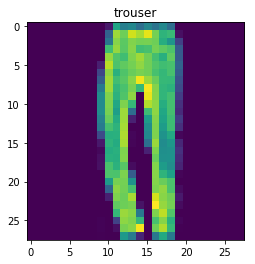

In [116]:
# TODO: Explore the data, display some input images
import matplotlib.pyplot as plt
import numpy as np

ids = np.random.randint(0,60000)
plt.imshow(X_train[ids])
plt.title(label_class[y_train[ids]])

Now is time for the data preparation: data rescaling, label preparation.

Hint: you can use the Keras function `to_categorical`

In [4]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [118]:
X_test.shape

(10000, 784)

In [124]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
# TODO: Make the data preparation
#from sklearn.preprocessing import StandardScaler
import keras

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)

X_train = X_train / 255.

y_train_vector = keras.utils.to_categorical(y_train, num_classes = 10)
y_test_vector = keras.utils.to_categorical(y_test, num_classes = 10)

In [130]:
y_train, y_train_vector

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [131]:
y_train.shape, y_train_vector.shape

((60000,), (60000, 10))

Next step: model building with Keras. Build your neural network architecture. At first, I would recommend a light architecture: 2 hidden layers, with 10 units per layer. Put that model into a function, so that you can reuse it later.

In [23]:
from keras import regularizers

# TODO: Build your model
def model_two_layers(input_dim):

    model = Sequential()

    # Add the first Dense layers of 100 units with the input dimension
    model.add(Dense(100, input_dim=input_dim, activation='relu'))

    # Add four more layers of 100 units
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    
    # Add finally the output layer with one unit: the predicted result
    model.add(Dense(10, activation='softmax'))
    
    return model

In [24]:
from keras.callbacks import EarlyStopping, TensorBoard


model = model_two_layers(input_dim=X_train.shape[1])

# Compile the model with mean squared error (for regression)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=5), TensorBoard(log_dir='./src', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, update_freq='epoch') ]
# Now fit the model on 500 epoches with a batch size of 64
model.fit(X_train, y_train_vector, validation_data=(X_test, y_test_vector), epochs=100, batch_size=64)



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 149us/step - loss: 0.5351 - acc: 0.8105 - val_loss: 2.4856 - val_acc: 0.8422
Epoch 2/100
60000/60000 [==============================] - 8s 129us/step - loss: 0.3803 - acc: 0.8610 - val_loss: 2.8904 - val_acc: 0.8179
Epoch 3/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.3430 - acc: 0.8738 - val_loss: 2.3370 - val_acc: 0.8524
Epoch 4/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.3162 - acc: 0.8828 - val_loss: 2.4636 - val_acc: 0.8431
Epoch 5/100
60000/60000 [==============================] - 8s 131us/step - loss: 0.3005 - acc: 0.8869 - val_loss: 2.8705 - val_acc: 0.8185
Epoch 6/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.2864 - acc: 0.8935 - val_loss: 2.2356 - val_acc: 0.8588
Epoch 7/100
60000/60000 [==============================] - 8s 133us/step - loss: 0.2745 - acc: 0.8971 - val_loss: 2.

Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [ ]:
# TODO: Compile and fit your model


Once your model has been trained, compute the accuracy (and other metrics if you want) on the train and test dataset.

Be careful, Keras returns softmax output (so an array of 10 values between 0 and 1, for which the sum is equal to 1). To compute correctly the accuracy, you have to convert that array into a categorical array with zeros and a 1.

In [25]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score


score = model.evaluate(X_test, y_test_vector, verbose=0) 
score[1]

0.8532

In [26]:
import numpy as np
y_pred = model.predict(X_test)
acc = sum([np.argmax(y_test_vector[i])==np.argmax(y_pred[i]) for i in range(10000)])/10000
acc

0.8532

What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? The activation functions?

Play with some hyperparameters if you want to improve your results.